#Football Player Injury 2016-2021 Dataset

In [1]:
#link to the Kaggle dataset -> https://www.kaggle.com/datasets/kolambekalpesh/football-player-injury-data

import pandas as pd
import numpy as np

##Data Exploration

In [2]:
df_player_injury = pd.read_csv("/content/football_player_injury.csv")

In [3]:
df_player_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   p_id2                              1301 non-null   object 
 1   start_year                         1301 non-null   int64  
 2   season_days_injured                1301 non-null   int64  
 3   total_days_injured                 1301 non-null   int64  
 4   season_minutes_played              1301 non-null   float64
 5   season_games_played                1301 non-null   int64  
 6   season_matches_in_squad            1301 non-null   int64  
 7   total_minutes_played               1301 non-null   float64
 8   total_games_played                 1301 non-null   int64  
 9   dob                                1301 non-null   object 
 10  height_cm                          1301 non-null   float64
 11  weight_kg                          1301 non-null   float

In [ ]:
'''
About Dataset
Data Sources:
The following data sources were used for this model:
Player attributes - FIFA 16-21 data
Injury history - Transfermarkt injury history data.
Pulled and scraped from there using worldfootballR R package

Players/seasons in scope:
Original scope was all players who have played in the British Premier League at
any point between 2016/17 season and 2020/21 season
Due to complications and difficulties in joining 3 datasets from entirely
different sources, this came out to a total of 685 rows of data, consisting of 317 players

Training Data:
3 separate data sources were combined to create a datset which included player attributes
(i.e. - pace, height, weight), player injury history and player game time
Data was grouped on a player-year level
'''

In [5]:
df_player_injury.describe(include='all')

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
count,1301,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301,...,697.000000,685.000000,697.000000,697.000000,1301.000000,1301.000000,1299.000000,697.000000,697.000000,697.000000
unique,604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bendavies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-06-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018.099923,79.050730,260.710992,1483.156034,19.509608,25.089931,5533.593390,71.638739,NaN,...,53.279770,74.541947,79.501987,21.952038,23.039310,3.346272,1.823711,0.225251,786.351506,81.279770
std,NaN,1.384810,84.578169,202.741896,1014.013920,11.099727,10.157698,4095.421082,46.854260,NaN,...,63.111519,17.856054,71.057640,9.408793,1.470255,0.392971,0.999472,0.418048,1064.323175,84.353614
min,NaN,2016.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,7.000000,2.000000,0.000000,18.792451,2.500000,0.000000,0.000000,7.000000,0.000000
25%,NaN,2017.000000,24.000000,111.000000,612.000000,10.000000,19.000000,2012.000000,31.000000,NaN,...,23.000000,65.500000,29.000000,16.000000,22.093170,3.000000,1.000000,0.000000,191.000000,26.000000
50%,NaN,2018.000000,49.000000,210.000000,1440.000000,21.000000,28.000000,5023.000000,69.000000,NaN,...,35.000000,80.080645,60.500000,23.000000,23.074830,3.500000,2.000000,0.000000,427.000000,50.000000
75%,NaN,2019.000000,103.000000,370.000000,2311.000000,29.000000,33.000000,8387.000000,107.000000,NaN,...,64.000000,87.925926,111.500000,29.000000,23.947116,3.500000,3.000000,0.000000,903.000000,109.000000


In [6]:
columns_player_injury = [
    'p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
    'season_minutes_played', 'season_games_played', 'season_matches_in_squad',
    'total_minutes_played', 'total_games_played', 'dob', 'height_cm',
    'weight_kg', 'nationality', 'work_rate', 'pace', 'physic',
    'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
    'cumulative_games_played', 'minutes_per_game_prev_seasons',
    'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
    'bmi', 'work_rate_numeric', 'position_numeric',
    'significant_injury_prev_season', 'cumulative_days_injured',
    'season_days_injured_prev_season'
]

for col in columns_player_injury:
    missing = df_player_injury[col].isna().sum()
    duplicated = df_player_injury[col].duplicated().sum()
    total_non_null = df_player_injury[col].count()

    print(f"--- {col} ---")
    print(f"Missing values:        {missing}")
    print(f"Duplicated values:     {duplicated}")
    print(f"Total non-null values: {total_non_null}\n")

--- p_id2 ---
Missing values:        0
Duplicated values:     697
Total non-null values: 1301

--- start_year ---
Missing values:        0
Duplicated values:     1296
Total non-null values: 1301

--- season_days_injured ---
Missing values:        0
Duplicated values:     1036
Total non-null values: 1301

--- total_days_injured ---
Missing values:        0
Duplicated values:     952
Total non-null values: 1301

--- season_minutes_played ---
Missing values:        0
Duplicated values:     351
Total non-null values: 1301

--- season_games_played ---
Missing values:        0
Duplicated values:     1262
Total non-null values: 1301

--- season_matches_in_squad ---
Missing values:        0
Duplicated values:     1262
Total non-null values: 1301

--- total_minutes_played ---
Missing values:        0
Duplicated values:     747
Total non-null values: 1301

--- total_games_played ---
Missing values:        0
Duplicated values:     1140
Total non-null values: 1301

--- dob ---
Missing values:     

##Data Cleaning

In [7]:
#p_id2 column

#Missing values:        0
#Duplicated values:     697
#Total non-null values: 1301

df_player_injury['p_id2'].value_counts()

,count
p_id2,
bendavies,24
dannyrose,18
dannyward,12
adamsmith,12
callumwilson,8
...,...
timowerner,1
fikayotomori,1
willkeane,1


In [8]:
#start_year column

#Missing values:        0
#Duplicated values:     1296
#Total non-null values: 1301

df_player_injury['start_year'].value_counts()

,count
start_year,
2018,298
2019,279
2020,269
2016,232
2017,223


In [9]:
#season_days_injured column

#Missing values:        0
#Duplicated values:     1036
#Total non-null values: 1301

df_player_injury['season_days_injured'].value_counts()

#range check -> (0, 702)
df_player_injury['season_days_injured'].min(), df_player_injury['season_days_injured'].max()

(0, 702)

In [10]:
#total_days_injured column

#Missing values:        0
#Duplicated values:     952
#Total non-null values: 1301

df_player_injury['total_days_injured'].value_counts()

#range check -> (3, 2398)
df_player_injury['total_days_injured'].min(), df_player_injury['total_days_injured'].max()

(3, 2398)

In [11]:
#total_days_injured column

#Missing values:        0
#Duplicated values:     952
#Total non-null values: 1301

df_player_injury['total_days_injured'].value_counts()

#range check -> (3, 2398)
df_player_injury['total_days_injured'].min(), df_player_injury['total_days_injured'].max()

(3, 2398)

In [12]:
#season_minutes_played column

#Missing values:        0
#Duplicated values:     351
#Total non-null values: 1301

df_player_injury['season_minutes_played'].value_counts()

#range check -> (0.0, 3610.0)
df_player_injury['season_minutes_played'].min(), df_player_injury['season_minutes_played'].max()

(0.0, 3610.0)

In [13]:
#season_games_played column

#Missing values:        0
#Duplicated values:     1262
#Total non-null values: 1301

df_player_injury['season_games_played'].value_counts()

#range check -> (0, 38)
df_player_injury['season_games_played'].min(), df_player_injury['season_games_played'].max()

(0, 38)

In [14]:
#season_matches_in_squad column

#Missing values:        0
#Duplicated values:     1262
#Total non-null values: 1301

df_player_injury['season_matches_in_squad'].value_counts()

#range check -> (1, 54)
df_player_injury['season_matches_in_squad'].min(), df_player_injury['season_matches_in_squad'].max()

(1, 54)

In [15]:
#total_minutes_played column

#Missing values:        0
#Duplicated values:     747
#Total non-null values: 1301

df_player_injury['total_minutes_played'].value_counts()

#range check -> (0.0, 16768.0)
df_player_injury['total_minutes_played'].min(), df_player_injury['total_minutes_played'].max()

(0.0, 16768.0)

In [16]:
#total_games_played column

#Missing values:        0
#Duplicated values:     1140
#Total non-null values: 1301

df_player_injury['total_games_played'].value_counts()

#range check -> (0, 179)
df_player_injury['total_games_played'].min(), df_player_injury['total_games_played'].max()

(0, 179)

In [17]:
#dob column

#Missing values:        0
#Duplicated values:     713
#Total non-null values: 1301

#range check -> ('1979-12-05', '2002-06-27')
df_player_injury['dob'].min(), df_player_injury['dob'].max()

#check if all entries are in date format
pd.to_datetime(df_player_injury['dob'], errors='coerce').notna().all()

np.True_

In [18]:
#height_cm column

#Missing values:        0
#Duplicated values:     1136
#Total non-null values: 1301

df_player_injury['height_cm'].value_counts()

#range check -> (163.0, 203.0)
df_player_injury['height_cm'].min(), df_player_injury['height_cm'].max()

(163.0, 203.0)

In [19]:
#weight_kg column

#Missing values:        0
#Duplicated values:     1116
#Total non-null values: 1301

df_player_injury['weight_kg'].value_counts()

#range check -> (58.0, 99.0)
df_player_injury['weight_kg'].min(), df_player_injury['weight_kg'].max()

(58.0, 99.0)

In [20]:
#nationality column

#Missing values:        0
#Duplicated values:     1240
#Total non-null values: 1301

df_player_injury['nationality'].value_counts()

#check if all entries don't contain digits or special chars
df_player_injury['nationality'].str.match(r'^[A-Za-z\s\-]+$').all()

np.True_

In [21]:
#work_rate column

#Missing values:        0
#Duplicated values:     1293
#Total non-null values: 1301

df_player_injury['work_rate'].value_counts()

,count
work_rate,
Medium/Medium,434
High/Medium,337
Medium/High,209
High/High,206
Low/High,29
Low/Medium,29
High/Low,29
Medium/Low,28


In [22]:
#pace column

#Missing values:        95
#Duplicated values:     1017
#Total non-null values: 1206

df_player_injury['pace'].value_counts()

#range check -> (28.33333333333333, 93.0)
df_player_injury['pace'].min(), df_player_injury['pace'].max()

(28.33333333333333, 93.0)

In [23]:
#physic column

#Missing values:        95
#Duplicated values:     1055
#Total non-null values: 1206

df_player_injury['physic'].value_counts()

#range check -> (40.75, 88.16666666666667)
df_player_injury['physic'].min(), df_player_injury['physic'].max()

(40.75, 88.16666666666667)

In [24]:
#fifa_rating column

#Missing values:        0
#Duplicated values:     1097
#Total non-null values: 1301

df_player_injury['fifa_rating'].value_counts()

#range check -> (53.0, 89.5)
df_player_injury['fifa_rating'].min(), df_player_injury['fifa_rating'].max()

(53.0, 89.5)

In [25]:
#position column

#Missing values:        2 (initial)
#Duplicated values:     1296
#Total non-null values: 1299

df_player_injury['position'] = df_player_injury['position'].fillna('Unknown')

df_player_injury['position'].value_counts()

,count
position,
Defender,492
Midfielder,457
Forward,253
Goalkeeper,97
Unknown,2


In [26]:
#age column

#Missing values:        0
#Duplicated values:     1278
#Total non-null values: 1301

df_player_injury['age'].value_counts()

,count
age,
27,146
26,129
29,119
28,113
25,106
24,102
30,88
23,83
31,72


In [27]:
#cumulative_minutes_played column

#Missing values:        604
#Duplicated values:     661
#Total non-null values: 697

df_player_injury['cumulative_minutes_played'].value_counts()

#range check -> (0.0, 39102.0)
df_player_injury['cumulative_minutes_played'].min(), df_player_injury['cumulative_minutes_played'].max()

(0.0, 39102.0)

In [28]:
#cumulative_games_played column

#Missing values:        604
#Duplicated values:     1150
#Total non-null values: 697

df_player_injury['cumulative_games_played'].value_counts()

#range check -> (0.0, 508.0)
df_player_injury['cumulative_games_played'].min(), df_player_injury['cumulative_games_played'].max()

(0.0, 508.0)

In [29]:
#minutes_per_game_prev_seasons column

#Missing values:        616
#Duplicated values:     689
#Total non-null values: 685

df_player_injury['minutes_per_game_prev_seasons'].value_counts()

#range check -> (7.0, 95.0)
df_player_injury['minutes_per_game_prev_seasons'].min(), df_player_injury['minutes_per_game_prev_seasons'].max()

(7.0, 95.0)

In [30]:
#avg_days_injured_prev_seasons column

#Missing values:        604
#Duplicated values:     941
#Total non-null values: 697

df_player_injury['avg_days_injured_prev_seasons'].value_counts()

#range check -> (2.0, 702.0)
df_player_injury['avg_days_injured_prev_seasons'].min(), df_player_injury['avg_days_injured_prev_seasons'].max()

(2.0, 702.0)

In [31]:
#avg_games_per_season_prev_seasons column

#Missing values:        604
#Duplicated values:     1143
#Total non-null values: 697

df_player_injury['avg_games_per_season_prev_seasons'].value_counts()

#range check -> (0.0, 38.0)
df_player_injury['avg_games_per_season_prev_seasons'].min(), df_player_injury['avg_games_per_season_prev_seasons'].max()

(0.0, 38.0)

In [32]:
#bmi column

#Missing values:        0
#Duplicated values:     750
#Total non-null values: 1301

df_player_injury['bmi'].value_counts()

#range check -> (18.792450804048432, 28.5254746993544)
df_player_injury['bmi'].min(), df_player_injury['bmi'].max()

(18.792450804048432, 28.5254746993544)

In [33]:
#work_rate_numeric column

#Missing values:        0
#Duplicated values:     1297
#Total non-null values: 1301

df_player_injury['work_rate_numeric'].value_counts()

#range check -> (2.5, 4.0)
df_player_injury['work_rate_numeric'].min(), df_player_injury['work_rate_numeric'].max()

(2.5, 4.0)

In [34]:
#position_numeric column

#Missing values:        2
#Duplicated values:     1296
#Total non-null values: 1299

df_player_injury['position_numeric'].value_counts()

#range check -> (0.0, 3.0)
df_player_injury['position_numeric'].min(), df_player_injury['position_numeric'].max()

(0.0, 3.0)

In [35]:
#significant_injury_prev_season column

#Missing values:        604
#Duplicated values:     1298
#Total non-null values: 697

df_player_injury['significant_injury_prev_season'].value_counts()

#range check -> (0.0, 1.0)
df_player_injury['significant_injury_prev_season'].min(), df_player_injury['significant_injury_prev_season'].max()

(0.0, 1.0)

In [36]:
#cumulative_days_injured column

#Missing values:        604
#Duplicated values:     774
#Total non-null values: 697

df_player_injury['cumulative_days_injured'].value_counts()

#range check -> (7.0, 7590.0)
df_player_injury['cumulative_days_injured'].min(), df_player_injury['cumulative_days_injured'].max()

(7.0, 7590.0)

In [37]:
#season_days_injured_prev_season column

#Missing values:        604
#Duplicated values:     1094
#Total non-null values: 697

df_player_injury['season_days_injured_prev_season'].value_counts()

#range check -> (0.0, 702.0)
df_player_injury['season_days_injured_prev_season'].min(), df_player_injury['season_days_injured_prev_season'].max()

(0.0, 702.0)

##Data Visualization

start_year
2018    298
2019    279
2020    269
2016    232
2017    223
Name: count, dtype: int64


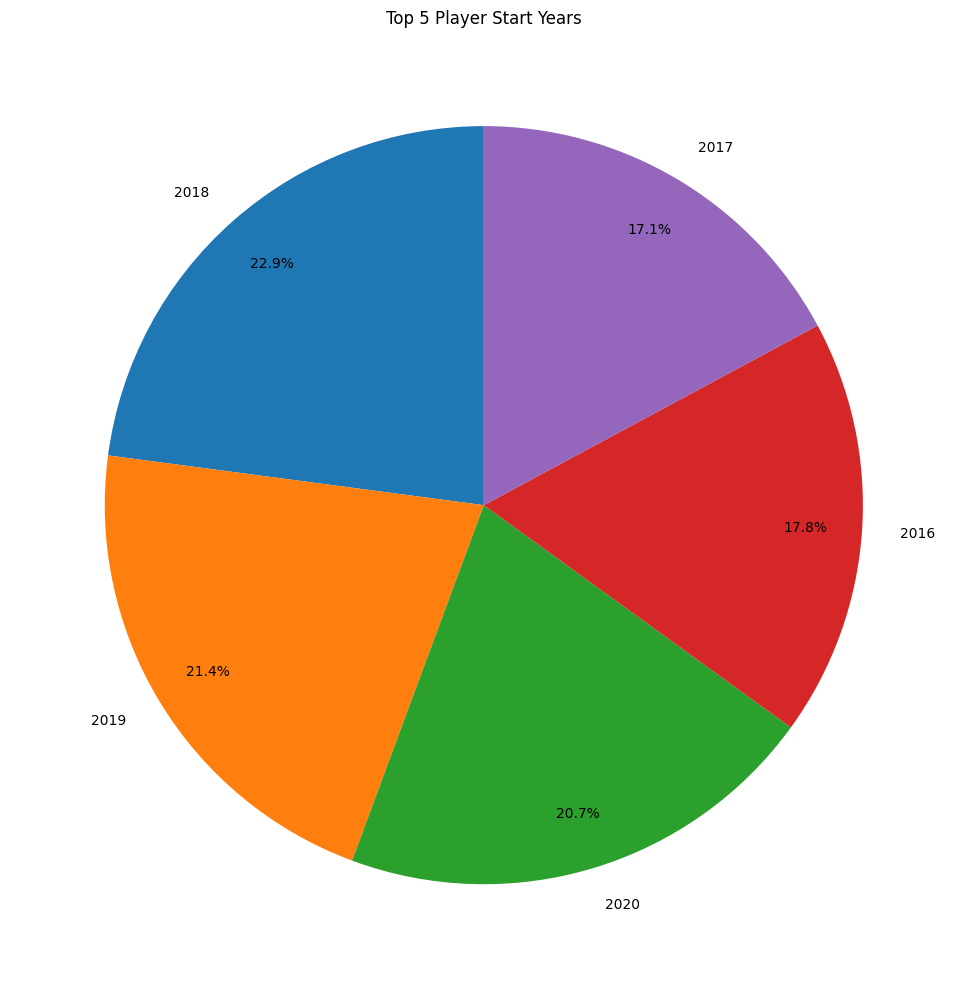

In [41]:
#start_year column

start_year_counts = df_player_injury['start_year'].value_counts()
print(start_year_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
start_year_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 5 Player Start Years')
plt.ylabel('')
plt.tight_layout()
plt.show()

total_days_injured
330    24
370    22
380    18
270    16
177    14
Name: count, dtype: int64


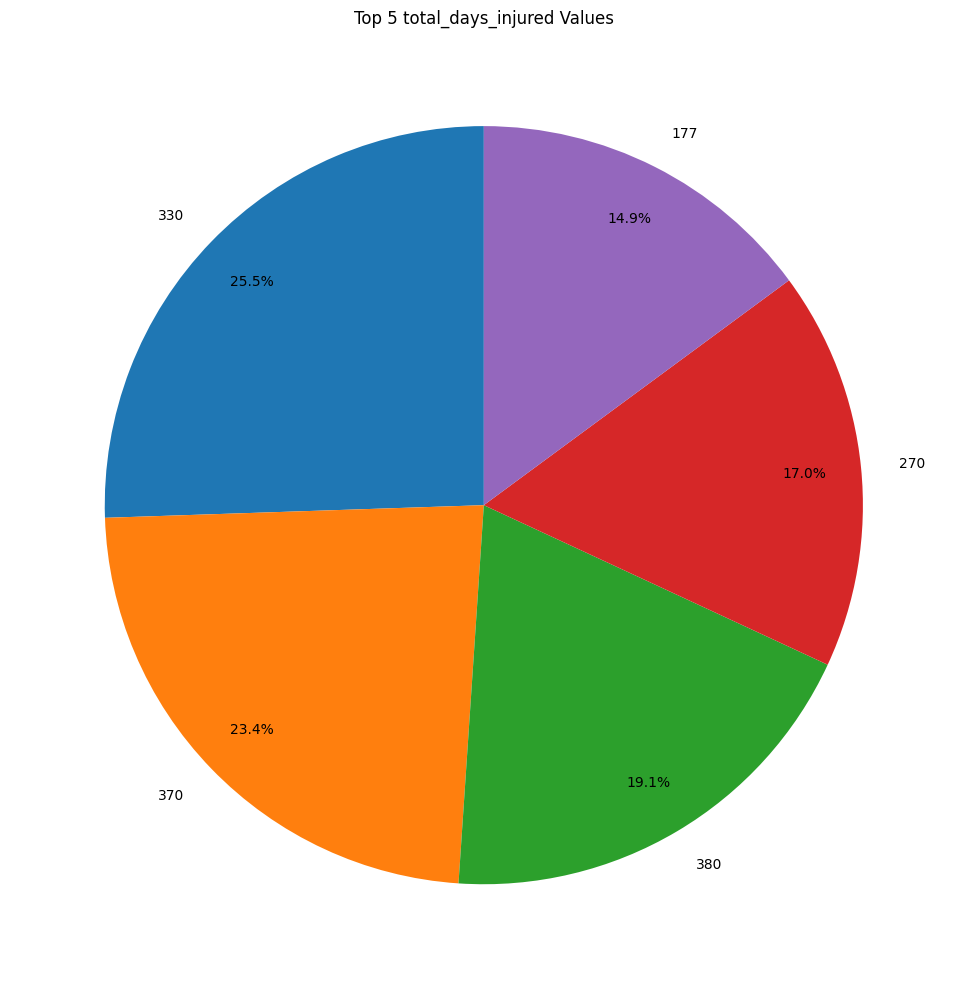

In [43]:
#total_days_injured column

total_days_injured_counts = df_player_injury['total_days_injured'].value_counts().head(5)
print(total_days_injured_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
total_days_injured_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 5 total_days_injured Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

total_games_played
77     38
117    29
75     23
0      22
102    20
Name: count, dtype: int64


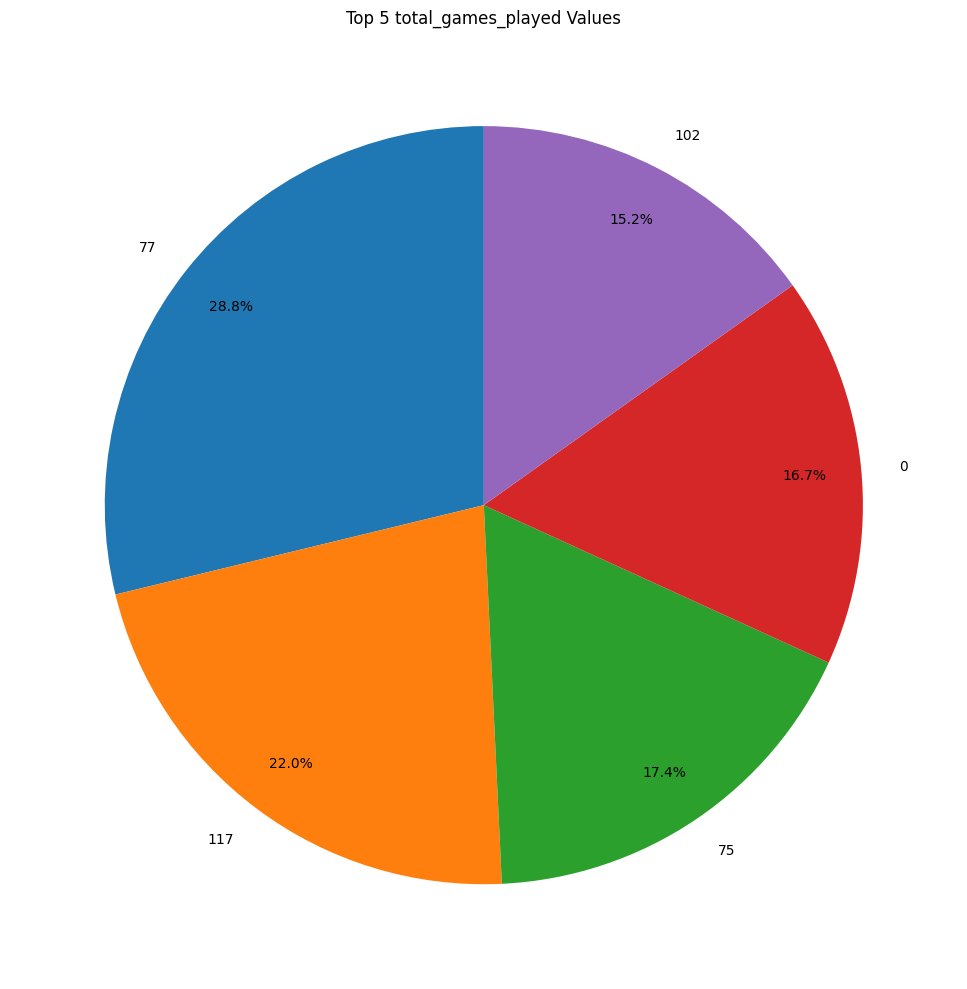

In [44]:
#total_games_played column

total_games_played_counts = df_player_injury['total_games_played'].value_counts().head(5)
print(total_games_played_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
total_games_played_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 5 total_games_played Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

nationality
England                551
France                  87
Republic of Ireland     55
Scotland                52
Netherlands             51
Name: count, dtype: int64


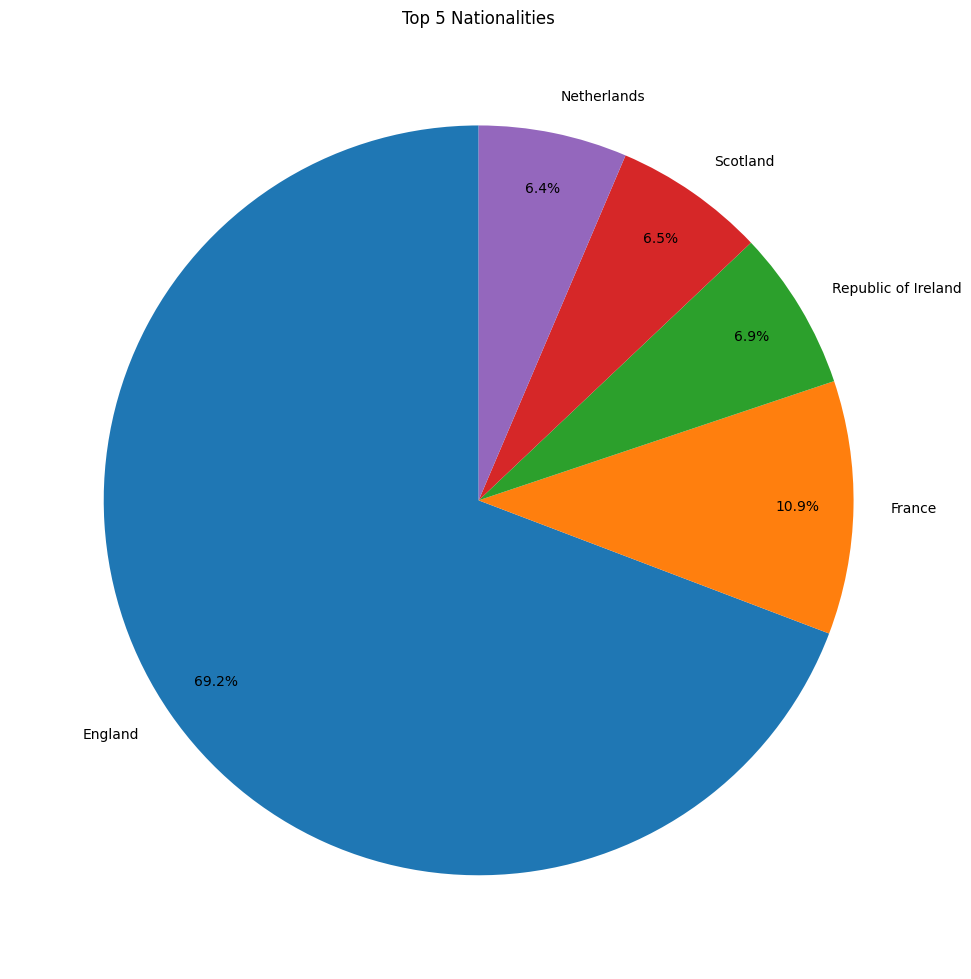

In [45]:
#nationality column

nationality_counts = df_player_injury['nationality'].value_counts().head(5)
print(nationality_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nationality_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('Top 5 Nationalities')
plt.ylabel('')
plt.tight_layout()
plt.show()

work_rate
Medium/Medium    434
High/Medium      337
Medium/High      209
High/High        206
Low/High          29
Low/Medium        29
High/Low          29
Medium/Low        28
Name: count, dtype: int64


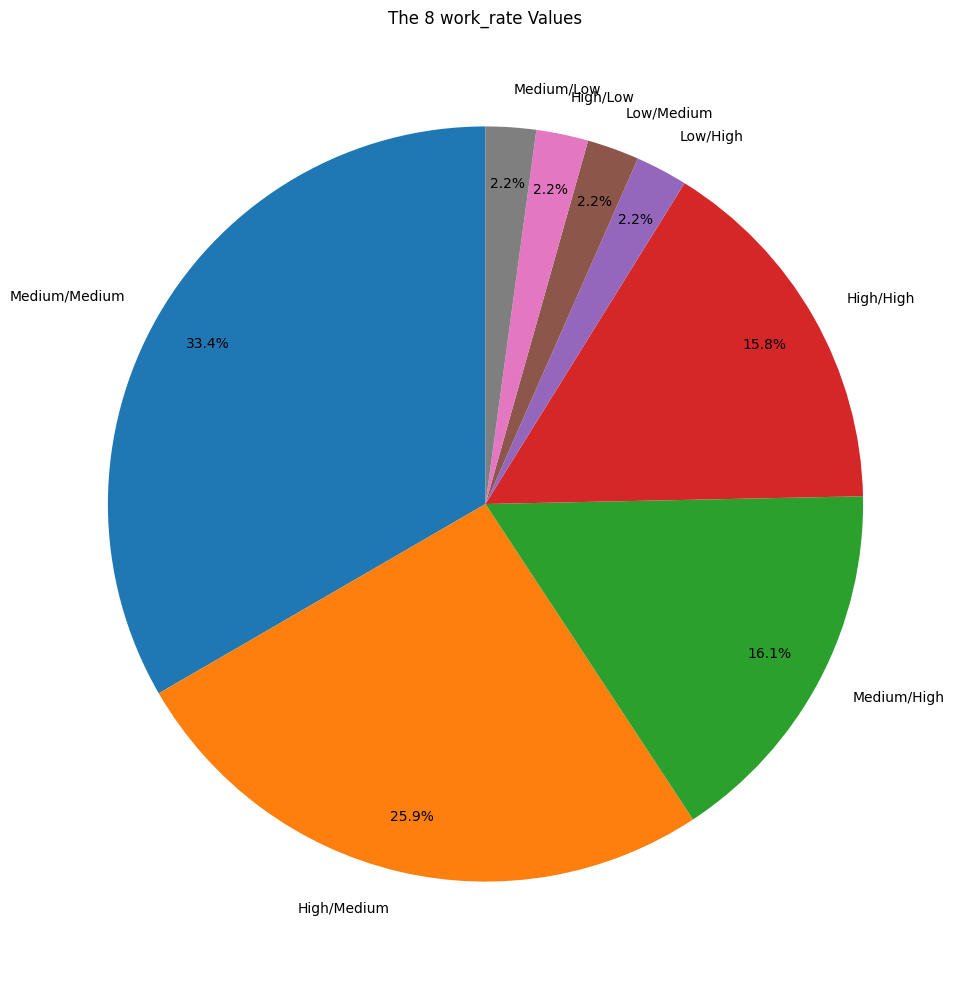

In [47]:
#work_rate column

work_rate_counts = df_player_injury['work_rate'].value_counts()
print(work_rate_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
work_rate_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('The 8 work_rate Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

fifa_rating
75.500000    29
75.333333    27
72.000000    26
76.000000    22
75.666667    22
77.500000    21
75.000000    21
78.666667    21
74.000000    21
75.166667    20
Name: count, dtype: int64


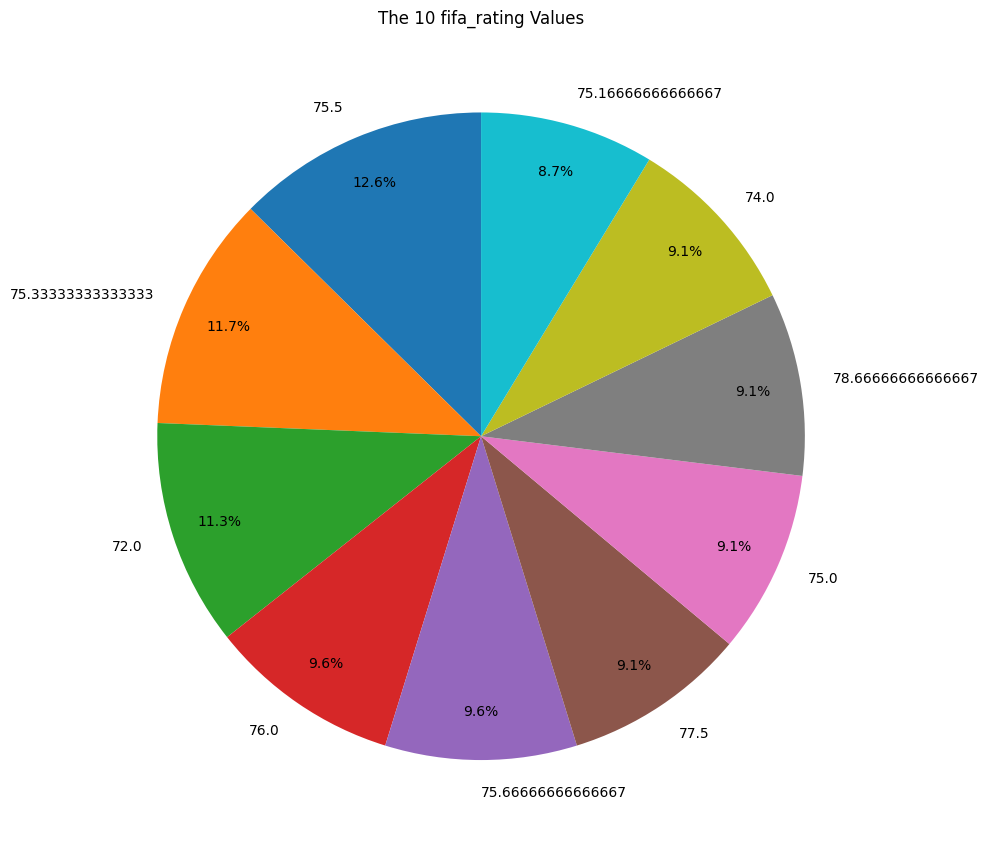

In [49]:
#fifa_rating column

fifa_rating_counts = df_player_injury['fifa_rating'].value_counts().head(10)
print(fifa_rating_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
fifa_rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('The 10 fifa_rating Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

position
Defender      492
Midfielder    457
Forward       253
Goalkeeper     97
Unknown         2
Name: count, dtype: int64


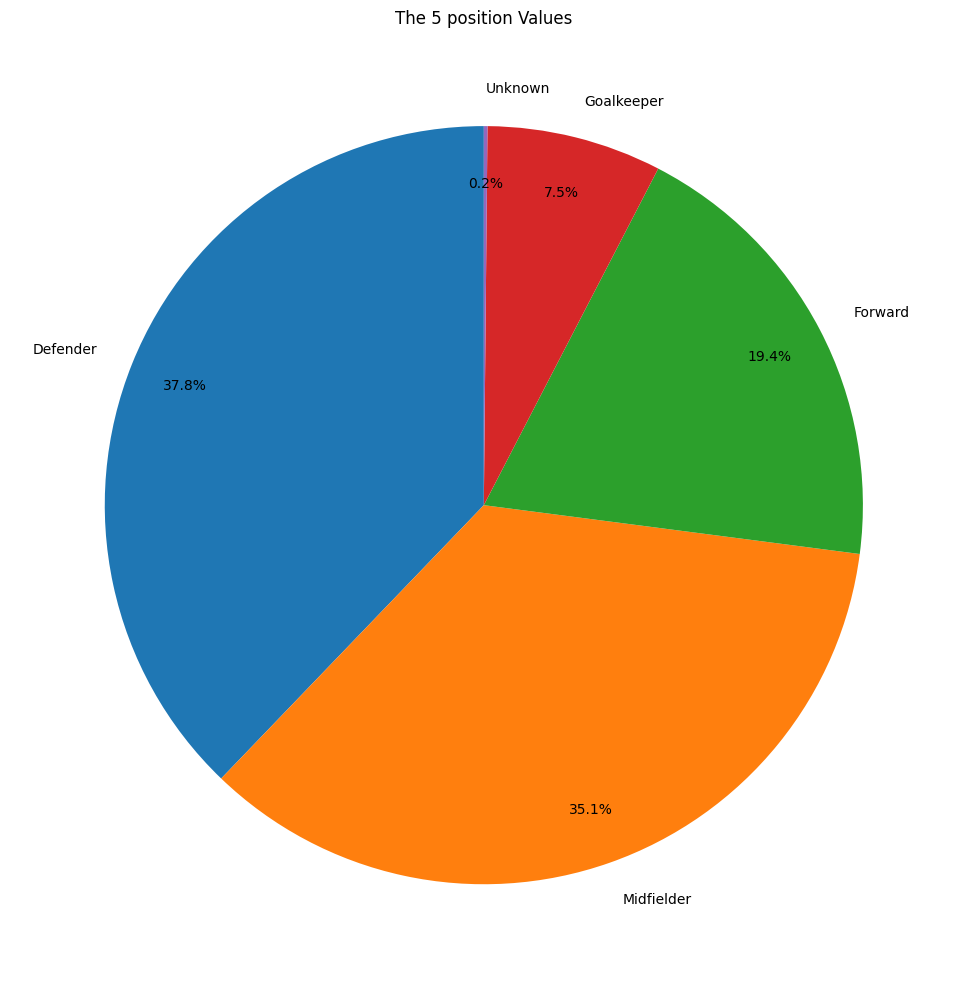

In [51]:
#position column

position_counts = df_player_injury['position'].value_counts()
print(position_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('The 5 position Values')
plt.ylabel('')
plt.tight_layout()
plt.show()

age
27    146
26    129
29    119
28    113
25    106
24    102
30     88
23     83
31     72
Name: count, dtype: int64


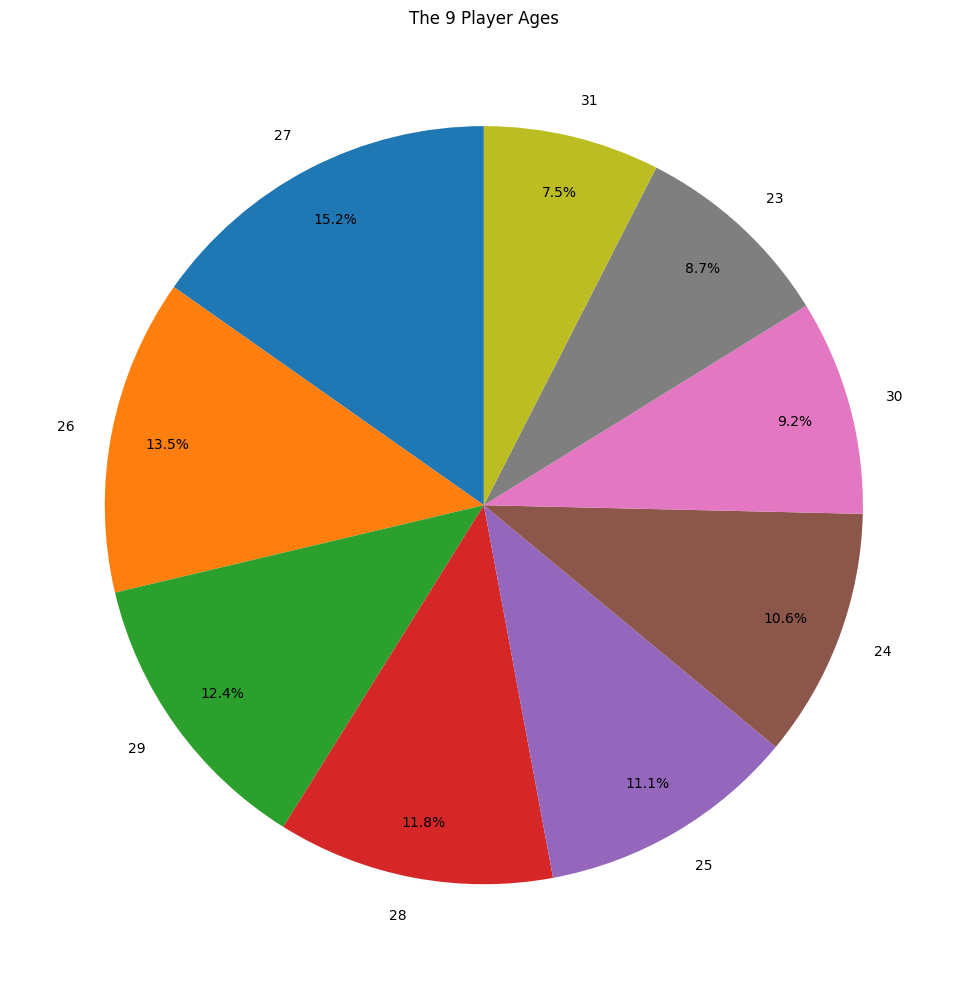

In [54]:
#age column

age_counts = df_player_injury['age'].value_counts().head(9)
print(age_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, legend=False)
plt.title('The 9 Player Ages')
plt.ylabel('')
plt.tight_layout()
plt.show()